In [1]:
import pandas as pd 

df=pd.read_csv("train.csv")

df = df.drop('Cabin',axis=1)

df

df['Age']= df['Age'].fillna(df.Age.mean())

df=df.dropna(subset=['Embarked'])

X=df[['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']]
y=df['Survived']


# X=pd.get_dummies(X, columns=['Pclass','Sex','Embarked'])

# X



In [2]:
import numpy as np

In [3]:
age_bins = np.linspace(0,90,10)
X['Age'] = pd.cut(X.Age, bins=age_bins)

<ipython-input-3-449a236d0a8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = pd.cut(X.Age, bins=age_bins)


In [4]:

X=pd.get_dummies(X, columns=['Pclass','Sex','Embarked','Age'])

X

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,"Age_(0.0, 10.0]","Age_(10.0, 20.0]","Age_(20.0, 30.0]","Age_(30.0, 40.0]","Age_(40.0, 50.0]","Age_(50.0, 60.0]","Age_(60.0, 70.0]","Age_(70.0, 80.0]","Age_(80.0, 90.0]"
0,1,0,7.2500,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0
1,1,0,71.2833,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0
3,1,0,53.1000,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,13.0000,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
887,0,0,30.0000,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
888,1,2,23.4500,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0
889,0,0,30.0000,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split( X,y,test_size= 0.2,random_state = 32 )

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'n_features_in_': 20,
 'n_features_': 20,
 'n_outputs_': 1,
 'classes_': array([0, 1], dtype=int64),
 'n_classes_': 2,
 'max_features_': 20,
 'tree_': <sklearn.tree._tree.Tree at 0x266b6de1e30>}

In [29]:
model = DecisionTreeClassifier(max_depth=2)  ## DecisionTreeClassifier(max_depth=2)

In [30]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [31]:
from sklearn.tree import plot_tree

[Text(167.4, 181.2, 'X[6] <= 0.5\ngini = 0.479\nsamples = 711\nvalue = [429, 282]'),
 Text(83.7, 108.72, 'X[3] <= 0.5\ngini = 0.317\nsamples = 451\nvalue = [362, 89]'),
 Text(41.85, 36.23999999999998, 'gini = 0.247\nsamples = 353\nvalue = [302, 51]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.475\nsamples = 98\nvalue = [60, 38]'),
 Text(251.10000000000002, 108.72, 'X[5] <= 0.5\ngini = 0.383\nsamples = 260\nvalue = [67, 193]'),
 Text(209.25, 36.23999999999998, 'gini = 0.083\nsamples = 138\nvalue = [6, 132]'),
 Text(292.95, 36.23999999999998, 'gini = 0.5\nsamples = 122\nvalue = [61, 61]')]

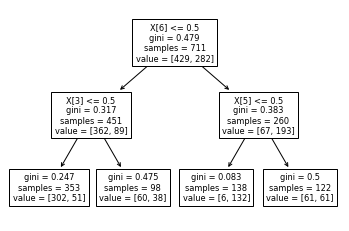

In [32]:
plot_tree(model)